# Naive Bayesian methods. 

In [49]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.feature_selection import f_classif
import itertools
import sys
import importlib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
# from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis 
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from joblib import Parallel, delayed, parallel_backend
from threadpoolctl import threadpool_limits
import matplotlib.pylab as plt
import os
from sklearn.inspection import permutation_importance
from scipy.stats import norm, t
from sklearn.base import clone 

sys.path.append("../")
from proj_mod import training
importlib.reload(training);

## Data importing 

In [40]:
df=pd.read_csv("../data/raw.csv")
features=list(df.columns)[1:]
target=["Y"]
feat=df[features]
tar=df[target]
# x_t, x_v, y_t, y_v= train_test_split(feat,tar, test_size=0.2, random_state=0, stratify=tar["Y"])
n_splits=5

## For all raw features 

In [41]:
eva_pipe=Pipeline([("DataCreater", training.data_creator(counts=True)),("DataSelector",training.data_selector())])
tar_arr=np.ravel(tar.values)
eva_pipe.fit(X=feat,y=tar)
eva_out=eva_pipe.transform(X=feat)
eva_out.columns

Index(['X1', 'X3', 'X5', 'X6', 'mean', 'F_w_mean', 'above_4', 'above_5',
       'count_3', 'count_5'],
      dtype='object')

In [42]:
eva_pipe["DataSelector"].sel_

,features,f score,p value,X1,X2,X3,X4,X5,X6,mean,F_w_mean,above_3,above_4,above_5,count_1,count_2,count_3,count_4,count_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873,0.607460,0.834641,0.266199,0.492355,0.604855,-0.272144,-0.063015,-0.362352,-0.182806,0.604855,0.280160
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750,0.676149,0.532371,0.442280,0.638649,0.481689,-0.368676,-0.189451,-0.402565,0.097357,0.481689,0.150838
4,X5,6.582716,0.011488,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195,0.712786,0.806779,0.491804,0.616787,0.586695,-0.292405,-0.330012,-0.343809,-0.040143,0.586695,0.224522
5,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000,0.540096,0.574523,0.261704,0.458477,0.490605,-0.275081,-0.054304,-0.327806,-0.090021,0.490605,0.167669
6,mean,7.306094,0.007836,0.607460,0.426097,0.676149,0.557803,0.712786,0.540096,1.000000,0.869373,0.687659,0.848710,0.773920,-0.557112,-0.310913,-0.465487,-0.018374,0.773920,0.235885
7,F_w_mean,12.615311,0.000542,0.834641,0.078909,0.532371,0.298662,0.806779,0.574523,0.869373,1.000000,0.498831,0.743851,0.761327,-0.397480,-0.232290,-0.480216,-0.107788,0.761327,0.303878
9,above_4,7.194813,0.008308,0.492355,0.268810,0.638649,0.521454,0.616787,0.458477,0.848710,0.743851,0.465645,1.000000,0.546995,-0.306616,-0.282240,-0.788134,0.381294,0.546995,0.234181
10,above_5,6.520675,0.011874,0.604855,0.215269,0.481689,0.389949,0.586695,0.490605,0.773920,0.761327,0.229256,0.546995,1.000000,-0.129758,-0.160484,-0.448806,-0.565327,1.000000,0.223515
13,count_3,5.016985,0.026881,-0.362352,0.049254,-0.402565,-0.313167,-0.343809,-0.327806,-0.465487,-0.480216,0.177713,-0.788134,-0.448806,-0.103910,-0.121027,1.000000,-0.280964,-0.448806,-0.197196
15,count_5,6.520675,0.011874,0.604855,0.215269,0.481689,0.389949,0.586695,0.490605,0.773920,0.761327,0.229256,0.546995,1.000000,-0.129758,-0.160484,-0.448806,-0.565327,1.000000,0.223515


In [43]:
eva_pipe["DataSelector"].total_

,features,f score,p value,X1,X2,X3,X4,X5,X6,mean,F_w_mean,above_3,above_4,above_5,count_1,count_2,count_3,count_4,count_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873,0.607460,0.834641,0.266199,0.492355,0.604855,-0.272144,-0.063015,-0.362352,-0.182806,0.604855,0.280160
1,X2,0.073108,0.787313,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205,0.426097,0.078909,0.500598,0.268810,0.215269,-0.420657,-0.211012,0.049254,0.027148,0.215269,-0.024274
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750,0.676149,0.532371,0.442280,0.638649,0.481689,-0.368676,-0.189451,-0.402565,0.097357,0.481689,0.150838
3,X4,0.516657,0.473623,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888,0.557803,0.298662,0.383442,0.521454,0.389949,-0.308409,-0.175639,-0.313167,0.083189,0.389949,0.064415
4,X5,6.582716,0.011488,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195,0.712786,0.806779,0.491804,0.616787,0.586695,-0.292405,-0.330012,-0.343809,-0.040143,0.586695,0.224522
5,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000,0.540096,0.574523,0.261704,0.458477,0.490605,-0.275081,-0.054304,-0.327806,-0.090021,0.490605,0.167669
6,mean,7.306094,0.007836,0.607460,0.426097,0.676149,0.557803,0.712786,0.540096,1.000000,0.869373,0.687659,0.848710,0.773920,-0.557112,-0.310913,-0.465487,-0.018374,0.773920,0.235885
7,F_w_mean,12.615311,0.000542,0.834641,0.078909,0.532371,0.298662,0.806779,0.574523,0.869373,1.000000,0.498831,0.743851,0.761327,-0.397480,-0.232290,-0.480216,-0.107788,0.761327,0.303878
8,above_3,1.032794,0.311482,0.266199,0.500598,0.442280,0.383442,0.491804,0.261704,0.687659,0.498831,1.000000,0.465645,0.229256,-0.639627,-0.625264,0.177713,0.205652,0.229256,0.090886
9,above_4,7.194813,0.008308,0.492355,0.268810,0.638649,0.521454,0.616787,0.458477,0.848710,0.743851,0.465645,1.000000,0.546995,-0.306616,-0.282240,-0.788134,0.381294,0.546995,0.234181


### Gaussian

Gaussian takes any value, so we will just send everything we believe will be helpful in. 

In [45]:
range_feat_combin = training.all_combin(eva_out.columns)
model_choice={
    "Gaussian": GaussianNB()
    }

n_split = 5
n_repeats = 20

RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)

splits = list(RSKF.split(X=feat, y=tar))

def evaluate_combo(list_f_sel_tuple, model_name, splits, feat, tar):
    """
    Evaluate one (feature_set, n_neighbors) across all CV folds.
    
    :param list_f_sel_tuple: A tuple indicating a combination.
    :param model_name: A str name of the NB model used. 
    :param splits: A list of the pre generated splits. 
    :param feat: The feat df. 
    :param tar: The tar df. 
    :return: A dict with all the stats we want. 
    """
    list_f_sel = list(list_f_sel_tuple) 
    fold_acc = []
    fold_f1 = []

    for train_index, test_index in splits:
        x_tr, x_te = feat.iloc[train_index], feat.iloc[test_index]
        y_tr, y_te = tar.iloc[train_index], tar.iloc[test_index]

        y_tr = np.ravel(y_tr.values)
        y_te = np.ravel(y_te.values)

        pipe = Pipeline([
            ("DataCreate", training.data_creator(counts=True)),
            ("DataSelect", training.data_selector(force=list_f_sel)),
            ("scale", StandardScaler()),
            ("NB", clone(model_choice[model_name])),
        ])

        pipe.fit(X=x_tr, y=y_tr)
        y_p = pipe.predict(X=x_te)

        fold_acc.append(accuracy_score(y_true=y_te, y_pred=y_p))
        fold_f1.append(f1_score(y_true=y_te, y_pred=y_p))

    str_model = model_name
    str_features = ",".join(list_f_sel)
    acc_mean = float(np.mean(fold_acc))
    acc_std  = float(np.std(fold_acc))
    f1_mean  = float(np.mean(fold_f1))
    f1_std   = float(np.std(fold_f1))
    above_73 = float((np.array(fold_acc) >= 0.73).sum() / (len(splits)))
    norm_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std))
    acc_mean_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std/np.sqrt(len(splits))))

    msg = (
        "_"*20 + "\n"
        + f"Currently used features {str_features} and {model_name} NB.\n"
        + f"This combo has f1 mean {f1_mean} and f1 std {f1_std}, \n"
        + f"with acc mean {acc_mean} acc std {acc_std}, "
        + f"and sureness of beating 73% {above_73}.\n"
        + "_"*20
    )

    return {
        #Hyper-parameters
        "model": str_model,
        "features": str_features,
        #Performance
        "acc_mean": acc_mean,
        "acc_std": acc_std,
        "f1_mean": f1_mean,
        "f1_std": f1_std,
        "above_73": above_73,
        "norm_above_73": norm_above_73,
        "acc_mean_above_73": acc_mean_above_73,
        #Log
        "log": msg,
    }

jobs = list(itertools.product(range_feat_combin, list(model_choice.keys())))

results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(evaluate_combo)(feat_sel, model, splits, feat, tar)
    for feat_sel, model in jobs
)

#Hyper-parameter
list_feat      = [r["features"] for r in results]
list_model     = [r["model"] for r in results]
#Performance 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

In [46]:
df_results_Gus = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "model": list_model,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [47]:
df_results_Gus.sort_values(by=["above_73"],ascending=False)

,features,model,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
268,"X3,X5,mean,count_3",Gaussian,0.611031,0.082613,0.655625,0.083925,0.09,0.074922,0.0
222,"X1,X5,above_5,count_5",Gaussian,0.608231,0.082809,0.616037,0.100953,0.08,0.070716,0.0
470,"X1,X5,F_w_mean,above_5,count_5",Gaussian,0.608292,0.081815,0.621565,0.097477,0.07,0.068429,0.0
528,"X3,X5,mean,F_w_mean,count_3",Gaussian,0.603846,0.083175,0.648501,0.086814,0.07,0.064668,0.0
531,"X3,X5,mean,above_4,count_3",Gaussian,0.607815,0.081609,0.655354,0.084667,0.07,0.067172,0.0
...,...,...,...,...,...,...,...,...,...
981,"X1,X3,X5,X6,above_4,above_5,count_3,count_5",Gaussian,0.540785,0.086067,0.556404,0.100495,0.00,0.013958,0.0
1019,"X1,X3,X6,mean,F_w_mean,above_4,above_5,count_3...",Gaussian,0.520923,0.080230,0.545198,0.094876,0.00,0.004581,0.0
1020,"X1,X5,X6,mean,F_w_mean,above_4,above_5,count_3...",Gaussian,0.544385,0.085483,0.567705,0.099150,0.00,0.014951,0.0
2,X5,Gaussian,0.587569,0.070839,0.670835,0.076213,0.00,0.022183,0.0


In [48]:
df_results_Gus.to_csv("../data/NB_Gus_results_exhaust_raw6.csv", index= False)

### Count intakes: Multinomial and Complement 

Multinomial and complement methods takes counts and frequencies only. 

In [27]:
eva_feat=training.data_creator(counts=True)
all_count_feat=["above_3","above_4","above_5","count_1", "count_2", "count_3", "count_4", "count_5"]
eva_feat_out=eva_feat.fit(X=feat,y=tar).transform(X=feat)
eva_feat_out=eva_feat_out[all_count_feat]
eva_feat_out

,above_3,above_4,above_5,count_1,count_2,count_3,count_4,count_5
0,0.833333,0.333333,0.000000,0,1,3,2,0
1,0.833333,0.333333,0.166667,0,1,3,1,1
2,1.000000,0.333333,0.333333,0,0,4,0,2
3,1.000000,0.500000,0.333333,0,0,3,1,2
4,1.000000,0.500000,0.333333,0,0,3,1,2
...,...,...,...,...,...,...,...,...
121,0.833333,0.500000,0.166667,0,1,2,2,1
122,0.666667,0.500000,0.333333,0,2,1,1,2
123,1.000000,0.666667,0.333333,0,0,2,2,2
124,1.000000,0.666667,0.166667,0,0,2,3,1


In [32]:
eva_sel=training.data_selector(how="or")
eva_sel_out=eva_sel.fit(X=eva_feat_out,y=tar).transform(X=eva_feat_out)
eva_sel_out.columns

Index(['above_3', 'above_4', 'above_5', 'count_3', 'count_5'], dtype='object')

In [33]:
eva_sel.total_

,features,f score,p value,above_3,above_4,above_5,count_1,count_2,count_3,count_4,count_5,Y
0,above_3,1.032794,0.311482,1.000000,0.465645,0.229256,-0.639627,-0.625264,0.177713,0.205652,0.229256,0.090886
1,above_4,7.194813,0.008308,0.465645,1.000000,0.546995,-0.306616,-0.282240,-0.788134,0.381294,0.546995,0.234181
2,above_5,6.520675,0.011874,0.229256,0.546995,1.000000,-0.129758,-0.160484,-0.448806,-0.565327,1.000000,0.223515
3,count_1,0.457080,0.500251,-0.639627,-0.306616,-0.129758,1.000000,-0.199957,-0.103910,-0.158830,-0.129758,-0.060602
4,count_2,0.366975,0.545765,-0.625264,-0.282240,-0.160484,-0.199957,1.000000,-0.121027,-0.100881,-0.160484,-0.054321
5,count_3,5.016985,0.026881,0.177713,-0.788134,-0.448806,-0.103910,-0.121027,1.000000,-0.280964,-0.448806,-0.197196
6,count_4,0.032071,0.858165,0.205652,0.381294,-0.565327,-0.158830,-0.100881,-0.280964,1.000000,-0.565327,-0.016080
7,count_5,6.520675,0.011874,0.229256,0.546995,1.000000,-0.129758,-0.160484,-0.448806,-0.565327,1.000000,0.223515


In [34]:
count_feats=list(eva_sel_out.columns)
range_feat_combin = training.all_combin(count_feats)
model_choice={
    "Multinomial": MultinomialNB(),
    "Complement": ComplementNB() 
    }

n_split = 5
n_repeats = 20

RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)

splits = list(RSKF.split(X=feat, y=tar))

def evaluate_combo(list_f_sel_tuple, model_name, splits, feat, tar):
    """
    Evaluate one (feature_set, n_neighbors) across all CV folds.
    
    :param list_f_sel_tuple: A tuple indicating a combination.
    :param model_name: A str name of the NB model used. 
    :param splits: A list of the pre generated splits. 
    :param feat: The feat df. 
    :param tar: The tar df. 
    :return: A dict with all the stats we want. 
    """
    list_f_sel = list(list_f_sel_tuple) 
    fold_acc = []
    fold_f1 = []

    for train_index, test_index in splits:
        x_tr, x_te = feat.iloc[train_index], feat.iloc[test_index]
        y_tr, y_te = tar.iloc[train_index], tar.iloc[test_index]

        y_tr = np.ravel(y_tr.values)
        y_te = np.ravel(y_te.values)

        pipe = Pipeline([
            ("DataCreate", training.data_creator(counts=True)),
            ("DataSelect", training.data_selector(force=list_f_sel)),
            ("NB", clone(model_choice[model_name])),
        ])

        pipe.fit(X=x_tr, y=y_tr)
        y_p = pipe.predict(X=x_te)

        fold_acc.append(accuracy_score(y_true=y_te, y_pred=y_p))
        fold_f1.append(f1_score(y_true=y_te, y_pred=y_p))

    str_model = model_name
    str_features = ",".join(list_f_sel)
    acc_mean = float(np.mean(fold_acc))
    acc_std  = float(np.std(fold_acc))
    f1_mean  = float(np.mean(fold_f1))
    f1_std   = float(np.std(fold_f1))
    above_73 = float((np.array(fold_acc) >= 0.73).sum() / (len(splits)))
    norm_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std))
    acc_mean_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std/np.sqrt(len(splits))))

    msg = (
        "_"*20 + "\n"
        + f"Currently used features {str_features} and {model_name} NB.\n"
        + f"This combo has f1 mean {f1_mean} and f1 std {f1_std}, \n"
        + f"with acc mean {acc_mean} acc std {acc_std}, "
        + f"and sureness of beating 73% {above_73}.\n"
        + "_"*20
    )

    return {
        #Hyper-parameters
        "model": str_model,
        "features": str_features,
        #Performance
        "acc_mean": acc_mean,
        "acc_std": acc_std,
        "f1_mean": f1_mean,
        "f1_std": f1_std,
        "above_73": above_73,
        "norm_above_73": norm_above_73,
        "acc_mean_above_73": acc_mean_above_73,
        #Log
        "log": msg,
    }

jobs = list(itertools.product(range_feat_combin, list(model_choice.keys())))

results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(evaluate_combo)(feat_sel, model, splits, feat, tar)
    for feat_sel, model in jobs
)

#Hyper-parameter
list_feat      = [r["features"] for r in results]
list_model     = [r["model"] for r in results]
#Performance 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  38 out of  62 | elapsed:   47.1s remaining:   29.7s
[Parallel(n_jobs=-1)]: Done  45 out of  62 | elapsed:   47.9s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  52 out of  62 | elapsed:   59.7s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  59 out of  62 | elapsed:  1.0min remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:  1.0min finished


In [35]:
df_results_Counters = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "model": list_model,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [36]:
df_results_Counters.sort_values(by=["above_73"],ascending=False) 

,features,model,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
32,"above_3,above_4,count_3",Multinomial,0.625169,0.063007,0.710032,0.052744,0.08,4.807641e-02,0.0
25,"above_5,count_3",Complement,0.578092,0.095263,0.536779,0.146137,0.07,5.540021e-02,0.0
49,"above_5,count_3,count_5",Complement,0.594431,0.090290,0.584287,0.136699,0.07,6.661418e-02,0.0
20,"above_4,count_3",Multinomial,0.619569,0.060633,0.712132,0.048961,0.06,3.428163e-02,0.0
29,"count_3,count_5",Complement,0.594031,0.089642,0.584214,0.136625,0.06,6.465733e-02,0.0
...,...,...,...,...,...,...,...,...,...
34,"above_3,above_4,count_5",Multinomial,0.548169,0.074767,0.645688,0.072604,0.00,7.508512e-03,0.0
44,"above_4,above_5,count_5",Multinomial,0.548062,0.033387,0.703915,0.026137,0.00,2.527702e-08,0.0
38,"above_3,above_5,count_5",Multinomial,0.549338,0.070298,0.649575,0.067834,0.00,5.085565e-03,0.0
30,"above_3,above_4,above_5",Multinomial,0.547692,0.016165,0.707611,0.013610,0.00,0.000000e+00,0.0


In [37]:
df_results_Counters.sort_values(by=["acc_mean"],ascending=False) 

,features,model,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
32,"above_3,above_4,count_3",Multinomial,0.625169,0.063007,0.710032,0.052744,0.08,0.048076,0.0
20,"above_4,count_3",Multinomial,0.619569,0.060633,0.712132,0.048961,0.06,0.034282,0.0
36,"above_3,above_5,count_3",Multinomial,0.609169,0.073740,0.687830,0.070713,0.04,0.050648,0.0
42,"above_4,above_5,count_3",Multinomial,0.598077,0.084128,0.665227,0.088955,0.05,0.058425,0.0
27,"above_5,count_5",Complement,0.595215,0.081296,0.660414,0.073376,0.03,0.048663,0.0
...,...,...,...,...,...,...,...,...,...
5,above_5,Complement,0.452308,0.016165,0.000000,0.000000,0.00,0.000000,0.0
7,count_3,Complement,0.452308,0.016165,0.000000,0.000000,0.00,0.000000,0.0
3,above_4,Complement,0.452308,0.016165,0.000000,0.000000,0.00,0.000000,0.0
9,count_5,Complement,0.452308,0.016165,0.000000,0.000000,0.00,0.000000,0.0


In [39]:
df_results_Counters.to_csv("../data/NB_Counter_exhaust_raw6.csv", index= False)

### Categorical

We will remove the features that are not categorical (or simply has too many categories). And we will add a OrdinalEncoder layer. 

In [55]:
eva_feat=training.data_creator(counts=True)
eva_feat_out=eva_feat.fit(X=feat,y=tar).transform(X=feat)
all_cat_feat=[feature for feature in eva_feat_out.columns if feature not in ["F_w_mean","mean"]] 
eva_feat_out=eva_feat_out[all_cat_feat]
eva_feat_out

,X1,X2,X3,X4,X5,X6,above_3,above_4,above_5,count_1,count_2,count_3,count_4,count_5
0,3,3,3,4,2,4,0.833333,0.333333,0.000000,0,1,3,2,0
1,3,2,3,5,4,3,0.833333,0.333333,0.166667,0,1,3,1,1
2,5,3,3,3,3,5,1.000000,0.333333,0.333333,0,0,4,0,2
3,5,4,3,3,3,5,1.000000,0.500000,0.333333,0,0,3,1,2
4,5,4,3,3,3,5,1.000000,0.500000,0.333333,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,5,2,3,4,4,3,0.833333,0.500000,0.166667,0,1,2,2,1
122,5,2,3,4,2,5,0.666667,0.500000,0.333333,0,2,1,1,2
123,5,3,3,4,4,5,1.000000,0.666667,0.333333,0,0,2,2,2
124,4,3,3,4,4,5,1.000000,0.666667,0.166667,0,0,2,3,1


In [77]:
dict_cat=dict()
for key in eva_feat_out.columns: 
    dict_cat[key]=sorted(list(eva_feat_out[key].unique()))
dict_cat

{'X1': [np.int64(1), np.int64(3), np.int64(4), np.int64(5)],
 'X2': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)],
 'X3': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)],
 'X4': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)],
 'X5': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)],
 'X6': [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)],
 'above_3': [np.float64(0.3333333333333333),
  np.float64(0.5),
  np.float64(0.6666666666666666),
  np.float64(0.8333333333333334),
  np.float64(1.0)],
 'above_4': [np.float64(0.0),
  np.float64(0.16666666666666666),
  np.float64(0.3333333333333333),
  np.float64(0.5),
  np.float64(0.6666666666666666),
  np.float64(0.8333333333333334),
  np.float64(1.0)],
 'above_5': [np.float64(0.0),
  np.float64(0.16666666666666666),
  np.float64(0.3333333333333333),
  np.float64(0.5),
  np.float64(0.6666666666666666),
  np.float64(0.8333333333333334),
  np.float64(1.0)],
 'cou

In [56]:
eva_sel=training.data_selector()
eva_sel_out=eva_sel.fit(X=eva_feat_out,y=tar).transform(X=eva_feat_out)
eva_sel_out.columns

Index(['X1', 'X3', 'X5', 'X6', 'above_4', 'above_5', 'count_3', 'count_5'], dtype='object')

In [57]:
eva_sel.total_

,features,f score,p value,X1,X2,X3,X4,X5,X6,above_3,above_4,above_5,count_1,count_2,count_3,count_4,count_5,Y
0,X1,10.561708,0.001486,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873,0.266199,0.492355,0.604855,-0.272144,-0.063015,-0.362352,-0.182806,0.604855,0.280160
1,X2,0.073108,0.787313,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205,0.500598,0.268810,0.215269,-0.420657,-0.211012,0.049254,0.027148,0.215269,-0.024274
2,X3,2.886959,0.091807,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750,0.442280,0.638649,0.481689,-0.368676,-0.189451,-0.402565,0.097357,0.481689,0.150838
3,X4,0.516657,0.473623,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888,0.383442,0.521454,0.389949,-0.308409,-0.175639,-0.313167,0.083189,0.389949,0.064415
4,X5,6.582716,0.011488,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195,0.491804,0.616787,0.586695,-0.292405,-0.330012,-0.343809,-0.040143,0.586695,0.224522
5,X6,3.586849,0.060568,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000,0.261704,0.458477,0.490605,-0.275081,-0.054304,-0.327806,-0.090021,0.490605,0.167669
6,above_3,1.032794,0.311482,0.266199,0.500598,0.442280,0.383442,0.491804,0.261704,1.000000,0.465645,0.229256,-0.639627,-0.625264,0.177713,0.205652,0.229256,0.090886
7,above_4,7.194813,0.008308,0.492355,0.268810,0.638649,0.521454,0.616787,0.458477,0.465645,1.000000,0.546995,-0.306616,-0.282240,-0.788134,0.381294,0.546995,0.234181
8,above_5,6.520675,0.011874,0.604855,0.215269,0.481689,0.389949,0.586695,0.490605,0.229256,0.546995,1.000000,-0.129758,-0.160484,-0.448806,-0.565327,1.000000,0.223515
9,count_1,0.457080,0.500251,-0.272144,-0.420657,-0.368676,-0.308409,-0.292405,-0.275081,-0.639627,-0.306616,-0.129758,1.000000,-0.199957,-0.103910,-0.158830,-0.129758,-0.060602


In [81]:
count_feats=list(eva_sel_out.columns)
range_feat_combin = training.all_combin(count_feats)
model_choice={
    "Categorical": None
    }

n_split = 5
n_repeats = 20

RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)

splits = list(RSKF.split(X=feat, y=tar))

def evaluate_combo(list_f_sel_tuple, model_name, splits, feat, tar):
    """
    Evaluate one (feature_set, n_neighbors) across all CV folds.
    
    :param list_f_sel_tuple: A tuple indicating a combination.
    :param model_name: A str name of the NB model used. 
    :param splits: A list of the pre generated splits. 
    :param feat: The feat df. 
    :param tar: The tar df. 
    :return: A dict with all the stats we want. 
    """
    list_f_sel = list(list_f_sel_tuple) 
    fold_acc = []
    fold_f1 = []

    for train_index, test_index in splits:
        x_tr, x_te = feat.iloc[train_index], feat.iloc[test_index]
        y_tr, y_te = tar.iloc[train_index], tar.iloc[test_index]

        y_tr = np.ravel(y_tr.values)
        y_te = np.ravel(y_te.values)
        
        cats=[dict_cat[key] for key in list_f_sel]
        
        K=max(len(c) for c in cats)
        
        min_cats=[max(len(c), K + 1) for c in cats]

        pipe = Pipeline([
            ("DataCreate", training.data_creator(counts=True)),
            ("DataSelect", training.data_selector(force=list_f_sel)),
            ("OrEncoder", OrdinalEncoder(categories=cats,handle_unknown="use_encoded_value",unknown_value=K,dtype=int)), 
            ("NB", CategoricalNB(min_categories=min_cats)),
        ])

        pipe.fit(X=x_tr, y=y_tr)
        y_p = pipe.predict(X=x_te)

        fold_acc.append(accuracy_score(y_true=y_te, y_pred=y_p))
        fold_f1.append(f1_score(y_true=y_te, y_pred=y_p))

    str_model = model_name
    str_features = ",".join(list_f_sel)
    acc_mean = float(np.mean(fold_acc))
    acc_std  = float(np.std(fold_acc))
    f1_mean  = float(np.mean(fold_f1))
    f1_std   = float(np.std(fold_f1))
    above_73 = float((np.array(fold_acc) >= 0.73).sum() / (len(splits)))
    norm_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std))
    acc_mean_above_73 = float(1-norm.cdf(0.73, loc=acc_mean, scale=acc_std/np.sqrt(len(splits))))

    msg = (
        "_"*20 + "\n"
        + f"Currently used features {str_features} and {model_name} NB.\n"
        + f"This combo has f1 mean {f1_mean} and f1 std {f1_std}, \n"
        + f"with acc mean {acc_mean} acc std {acc_std}, "
        + f"and sureness of beating 73% {above_73}.\n"
        + "_"*20
    )

    return {
        #Hyper-parameters
        "model": str_model,
        "features": str_features,
        #Performance
        "acc_mean": acc_mean,
        "acc_std": acc_std,
        "f1_mean": f1_mean,
        "f1_std": f1_std,
        "above_73": above_73,
        "norm_above_73": norm_above_73,
        "acc_mean_above_73": acc_mean_above_73,
        #Log
        "log": msg,
    }

jobs = list(itertools.product(range_feat_combin, list(model_choice.keys())))

results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
    delayed(evaluate_combo)(feat_sel, model, splits, feat, tar)
    for feat_sel, model in jobs
)

#Hyper-parameter
list_feat      = [r["features"] for r in results]
list_model     = [r["model"] for r in results]
#Performance 
list_acc_mean  = [r["acc_mean"] for r in results]
list_acc_std   = [r["acc_std"] for r in results]
list_f1_mean   = [r["f1_mean"] for r in results]
list_f1_std    = [r["f1_std"] for r in results]
list_above_73  = [r["above_73"] for r in results]
list_norm_above_73 = [r["norm_above_73"] for r in results] 
list_acc_mean_above_73 = [r["acc_mean_above_73"] for r in results]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 250 out of 255 | elapsed:  4.2min remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapse

In [82]:
df_results_Cats = pd.DataFrame({
    #Hyper-parameters
    "features": list_feat,
    "model": list_model,
    #Performances
    "acc_mean": list_acc_mean,
    "acc_std": list_acc_std,
    "f1_mean": list_f1_mean,
    "f1_std": list_f1_std,
    "above_73": list_above_73,
    "norm_above_73": list_norm_above_73, 
    "acc_mean_above_73": list_acc_mean_above_73
})

In [83]:
df_results_Cats.sort_values(by=["above_73"],ascending=False) 

,features,model,acc_mean,acc_std,f1_mean,f1_std,above_73,norm_above_73,acc_mean_above_73
47,"X1,X6,above_4",Categorical,0.661431,0.092942,0.704892,0.094698,0.24,0.230330,8.060219e-14
118,"X1,X6,above_4,count_3",Categorical,0.640415,0.089925,0.689160,0.085676,0.16,0.159574,0.000000e+00
0,X1,Categorical,0.638292,0.087778,0.661949,0.088259,0.15,0.148064,0.000000e+00
117,"X1,X6,above_4,above_5",Categorical,0.634769,0.087533,0.665343,0.091472,0.11,0.138311,0.000000e+00
119,"X1,X6,above_4,count_5",Categorical,0.634769,0.087533,0.665343,0.091472,0.11,0.138311,0.000000e+00
...,...,...,...,...,...,...,...,...,...
133,"X3,X5,above_4,count_5",Categorical,0.578908,0.076875,0.628913,0.082410,0.00,0.024683,0.000000e+00
131,"X3,X5,above_4,above_5",Categorical,0.578908,0.076875,0.628913,0.082410,0.00,0.024683,0.000000e+00
215,"X5,X6,above_5,count_3,count_5",Categorical,0.564246,0.084510,0.590776,0.103022,0.00,0.024919,0.000000e+00
226,"X1,X3,X5,above_4,count_3,count_5",Categorical,0.584846,0.070933,0.626930,0.074792,0.00,0.020361,0.000000e+00


In [84]:
df_results_Cats.to_csv("../data/NB_Cats_results_exhaust_raw6.csv", index=False)

Now we are talking, investigating into 47 might be worth our time. 

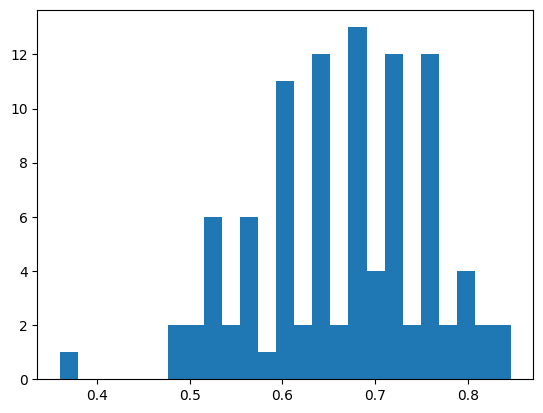

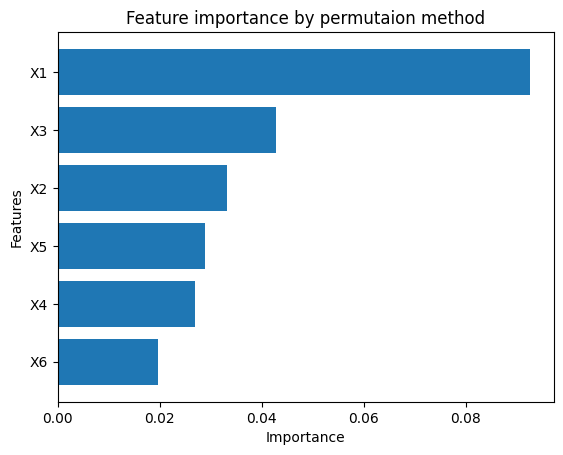

array([[0.2476    , 0.20470769],
       [0.13386154, 0.41383077]])

In [85]:
list_fold_acc=[]
list_fold_f1=[]
imp_record=None
cmatrix_record=None
n_split = 5
n_repeats = 20
RSKF = RepeatedStratifiedKFold(n_splits=n_split, random_state=420, n_repeats=n_repeats)
splits = list(RSKF.split(X=feat, y=tar))
for train_index, test_index in splits: 
    x_tr,x_te=feat.iloc[train_index], feat.iloc[test_index]
    y_tr, y_te=tar.iloc[train_index], tar.iloc[test_index]
        
    y_tr=np.ravel(y_tr.values)
    y_te=np.ravel((y_te.values))
        
    cats=[dict_cat[key] for key in ["X1","X6","above_4"]]
        
    K=max(len(c) for c in cats)
        
    min_cats=[max(len(c), K + 1) for c in cats]
        
    pipe = Pipeline([
            ("DataCreate", training.data_creator(counts=True)),
            ("DataSelect", training.data_selector(force=["X1","X6","above_4"])),
            ("OrEncoder", OrdinalEncoder(categories=cats,handle_unknown="use_encoded_value",unknown_value=K,dtype=int)), 
            ("NB", CategoricalNB(min_categories=min_cats)),
        ])
    pipe.fit(X=x_tr,y=y_tr)
    y_p=pipe.predict(X=x_te)
    acc=accuracy_score(y_pred=y_p,y_true=y_te)
    f1=f1_score(y_pred=y_p,y_true=y_te)
    list_fold_acc.append(acc)
    list_fold_f1.append(f1)
    # with parallel_backend("threading", n_jobs=-1):
    #     with threadpool_limits(limits=1):
    imp=permutation_importance(pipe,X=x_te.copy(deep=True),y=y_te,scoring="accuracy",n_repeats=30,n_jobs=-1,random_state=420)
    if imp_record is None: 
        imp_record=imp.importances_mean
    else: 
        imp_record=imp_record+imp.importances_mean
    cmatrix=confusion_matrix(y_pred=y_p,y_true=y_te)
    cmatrix=cmatrix/np.sum(cmatrix)
    if cmatrix_record is None: 
        cmatrix_record=cmatrix
    else: 
        cmatrix_record=cmatrix_record+cmatrix
    

plt.hist(list_fold_acc,bins=25)
plt.show()

imp_record=imp_record/len(splits)
imp_sort_index=imp_record.argsort()
plt.barh(feat.columns[imp_sort_index], imp_record[imp_sort_index])
plt.title("Feature importance by permutaion method")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

cmatrix_record=cmatrix_record/len(splits)
cmatrix_record #This is the "Average confusion matrix" 

It is interesting how X6 is present in the selected features, yet have the least importance. 